# Image Classification Example

### Here a simple example of how retrain and apply the efficientNet model thanks to the paramModel library.

In [22]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")
dirpath = os.getcwd()

sys.path.insert(1, '..')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

from transfer_learning import paramModel

### Set the trainig dataset path to the folders containing your images. You must store your images in seperate folders. Use exactly one folder per class.For example, here, all our bedroom images are in the bedroom folder just under the REI one

In [23]:
dirpath = os.getcwd()
train_dataset_path = "../../../REI-Dataset/REI/"
labels = os.listdir(train_dataset_path)
print("{} classes found in the followimg directories :".format(len(labels)))
print(labels)

6 classes found in the followimg directories :
['bedroom', 'backyard', 'bathroom', 'frontyard', 'livingRoom', 'kitchen']


### Set your datagenerator (optional).  Increase the regurlarization by feeding the model with modiefied images. Here we are playing with the zooming range and the brightness range for instance.

In [24]:
datagen = ImageDataGenerator(
        brightness_range=[0.5,1.5],
        rescale=1/255,
        validation_split=0.10,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
        )

### The proper way to use the library, the model is built with the efficientnet neural network structure and initialized with the imagenet weights. 

['bedroom', 'backyard', 'bathroom', 'frontyard', 'livingRoom', 'kitchen']
Found 5284 images belonging to 6 classes.
Found 585 images belonging to 6 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Model)      (None, 1536)              10783528  
_________________________________________________________________
dense_4 (Dense)              (None, 120)               184440    
_________________________________________________________________
dense_5 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 726       
Total params: 10,983,214
Trainable params: 10,895,918
Non-trainable params: 87,296
____________

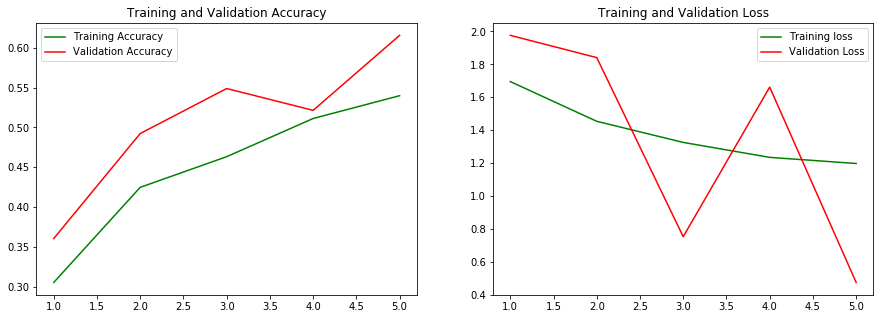

Saved final model : RoomRecognition.h5
Saved best model considering val_loss : RoomRecognition_best_model.h5


In [25]:
model_trainer = paramModel.ModelRetrainer()
model_trainer.setModelType("EfficientNetB3")
model_trainer.setImageGenerator(datagen)
model_trainer.setDataDirectory(train_dataset_path)
model_trainer.setTrainConfig(image_size=32, batch_size=8, epoch_number=5, lr = 0.001, model_name="RoomRecognition")

model_trainer.trainModel()

### The model can be now applied to any test dataset

In [5]:
loaded_model = load_model('RoomRecognition.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b3 (Model)      (None, 1536)              10783528  
_________________________________________________________________
dense_1 (Dense)              (None, 120)               184440    
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 726       
Total params: 10,983,214
Trainable params: 10,895,918
Non-trainable params: 87,296
_________________________________________________________________


In [9]:
test_datagen = ImageDataGenerator(
    rescale=1/255
)

test_generator = test_datagen.flow_from_directory(
    directory = train_dataset_path,
    target_size=(32,32),
    batch_size=1,
    shuffle=False,
    class_mode= None,
)

preds = loaded_model.predict_generator(
    test_generator,
    steps=len(test_generator.filenames),
    verbose = 1

)

Found 5869 images belonging to 6 classes.
5869/5869 [==============================] - 84s 14ms/step


### Let's try it on a few random images of our dataset

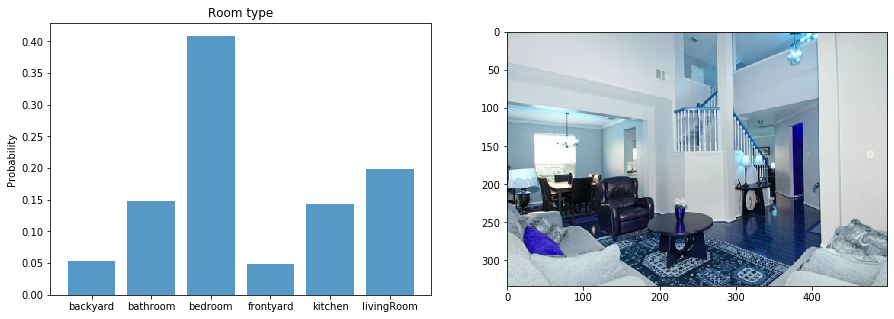

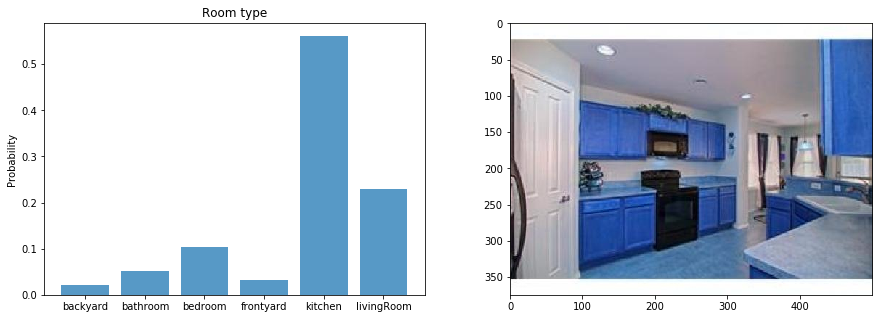

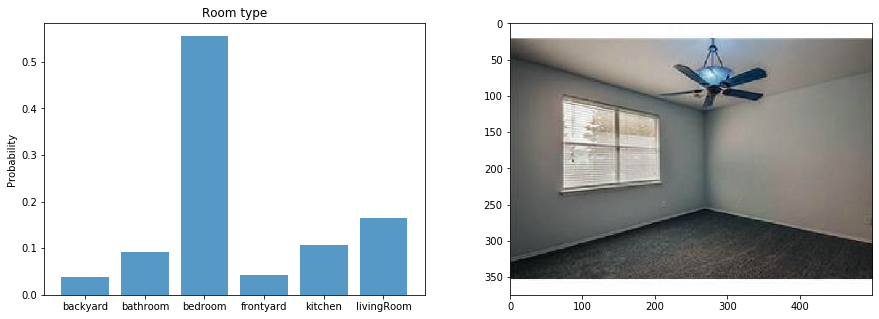

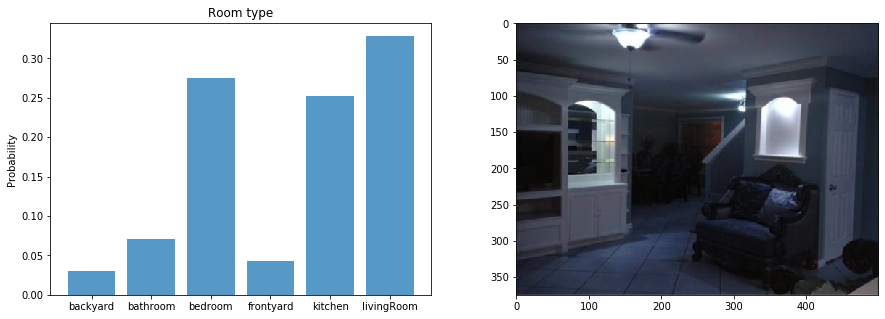

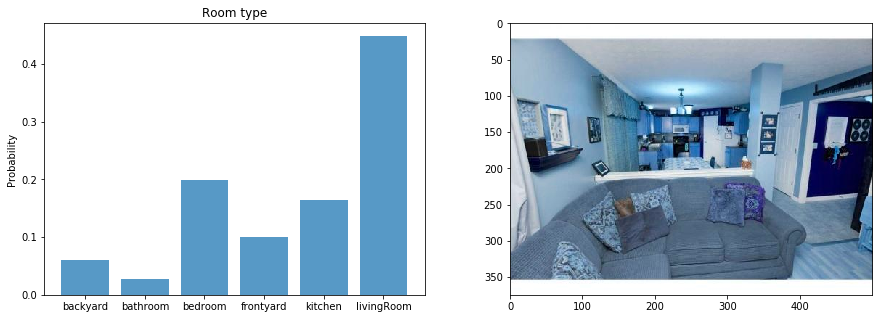

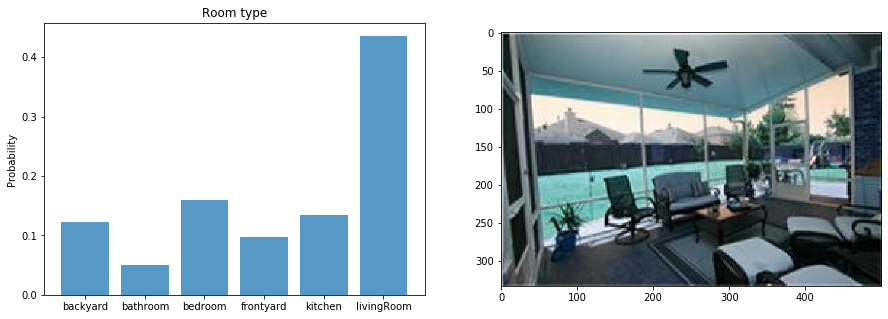

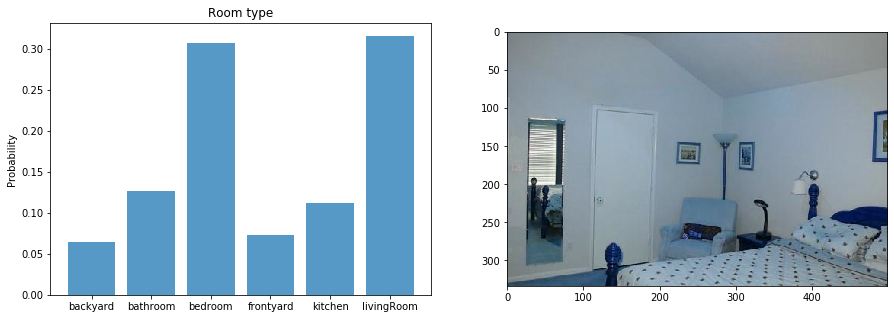

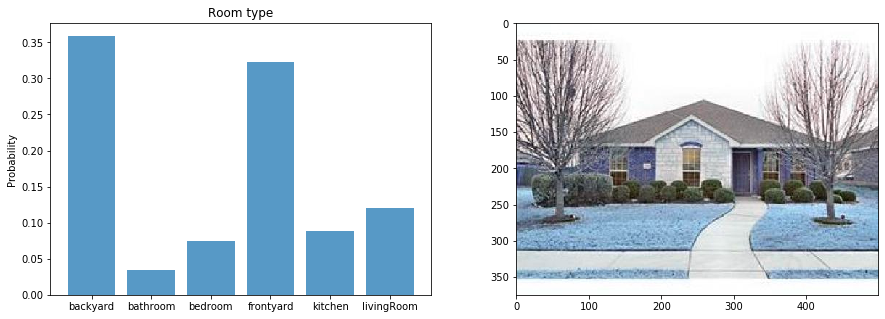

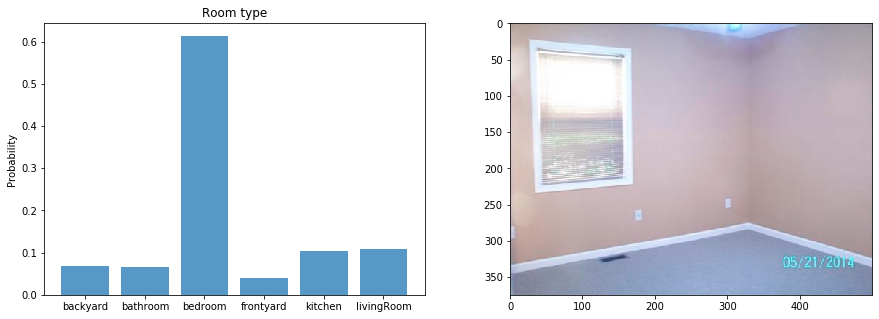

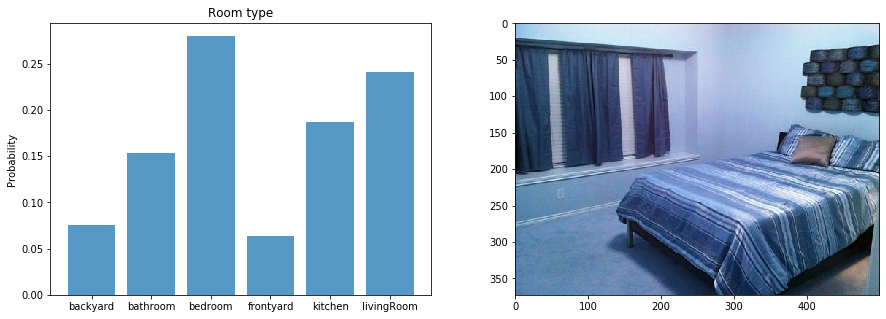

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randrange


objects = ['backyard', 'bathroom', 'bedroom', 'frontyard', 'kitchen', 'livingRoom']

for i in range(10):
    rn = randrange(len(test_generator.filenames))
    fig=plt.figure(figsize=(15, 5))
    fig.add_subplot(1, 2, 1)
    y_pos = np.arange(len(objects))
    performance = preds[rn]
    plt.bar(y_pos, performance, align='center', alpha=0.75)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability')
    plt.title('Room type')

    fig.add_subplot(1, 2, 2)
    path = "../../../REI-Dataset/REI/" + test_generator.filenames[rn]
    img = cv2.imread(path)
    plt.imshow(img)